##### Chi-Cuadrada
<h1><center>Entornos de soporte al desarrollo de simulaciones</center></h1>
<h2><center> Universidad "Politecnica Salesiana" </center></h2>
<h5><right>Alumno: Juan Cañar. <br> Docente: Ing. Diego Quisi. </right></h5>

##### Prueba Chi-Cuadrada

In [1]:
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
from prettytable import PrettyTable
import random

Es fundamental verificar la calidad de los números  pseudoaleatorios. Ademas es importante no olvidar las 2 propiedades más importantes que deben tener los números pseudoaleatorios: uniformidad e independencia.

La uniformidad se puede verificar usando las pruebas de bondad de ajuste test Chi Cuadrada

Chi-Cuadrada

Esta prueba verifica la desviación del valor esperado y  se usa cuando se trabaja con variables nominales (categorías o grupos)
Debemos responder a la pregunta: ¿Difieren las frecuencias observadas de la frecuencia esperada?

Pasos para aplicar la prueba:

1. Tomar la serie de N números pseudo-aleatorios.

2. Dividir la serie en n intervalos (grados libertad)

3. Calcular la esperanza
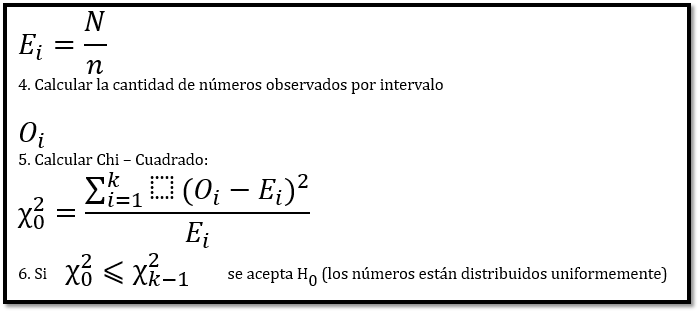

### CÁLCULO DE LOS CUADRADOS MEDIOS

In [15]:
def cuadradosMedios(itera, seed, dig):
    valor=0
    lista = []
    if dig % 2 !=0:
        valor = int(dig/2), int(digs/2)+1
    else:
        valor = int(digs / 2), int(digs / 2)
    
    valueInit, valueFi = valor
    num = int(seed)
    for i in range(itera):
        num = pow(num,2)
        tam = len(str(num))
        centro = str(num)[int(tam / 2) - valueInit: int(tam / 2) + valueFi]
        rd = round(int(centro) / pow(10,dig), 2)
        lista.append(rd)
        num = int(centro)
        ##print("lista",lista)
    return lista

### CALCULO DE LA CONGRUENCIA LINEAL

In [39]:
def congruenciaLineal(seed,iteraciones,a,c,m, dig):
    diccionario = {}
    p1 = 0
    lista = []
    for i in range(1, iteraciones):
        xn = (a*seed + c) % m
        seed = xn
        lista.append(round(xn/((dig*2)+(dig/2)+1),2))
    
    for j in range(0, 10):
        key = str(float(j) / 10) + "-" + str(float(j + 1) / 10)
        diccionario[key] = len(list(filter(lambda x: p1 < x < p1 + 0.1, lista)))
        p1 += 0.1
    return dic

## CÁLCULO DE CHI-CUADRADO - JI Cuadrado 

In [22]:
def metodoChicuadrado(dic, val_vali):
    ei = []
    oi = []
    suma = []
    for i in list(dic.keys()):
        ei.append(i)
        oi.append(dic[i])
        suma.append((len(dic) - dic[i]) ** 2 / len(dic))
    d = {'Ei': ei, 'Oi': oi, "(Oi – Ei)^²/Ei": suma}
    df = pd.DataFrame(data=d)
    total = df['(Oi – Ei)^²/Ei'].sum()
    validacion = total < val_vali
    return df, total, validacion

## GRÁFICA

In [18]:
def grafica(diccionario):
    plt.figure(figsize=(18, 9))
    keys = diccionario.keys()
    values = diccionario.values()
    plt.bar(keys, values,align='center', alpha=0.5,color='#f36841')
    ##plt.hist(x=values, bins='auto', color='#0504aa',   alpha=0.7, rwidth=0.85)
    plt.title("Histograma con valores de Chi-Cuadrado")
    plt.show()

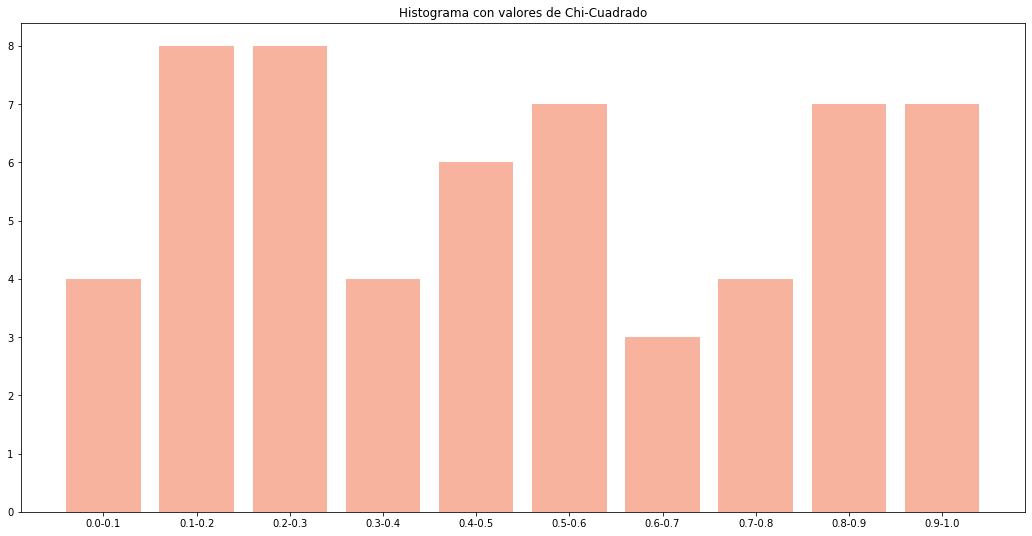

------------------------------------------------------------------------------------
					RESULTADOS
------------------------------------------------------------------------------------
La distribución uniforme no se acepta Resultado es ---> False
------------------------------------------------------------------------------------
Total de (Oi – Ei)^²/Ei = 20.799999999999997
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
Tabla con valores - Chi Cuadrado
------------------------------------------------------------------------------------
        Ei  Oi  (Oi – Ei)^²/Ei
0  0.0-0.1   4             3.6
1  0.1-0.2   8             0.4
2  0.2-0.3   8             0.4
3  0.3-0.4   4             3.6
4  0.4-0.5   6             1.6
5  0.5-0.6   7             0.9
6  0.6-0.7   3             4.9
7  0.7-0.8   4             3.6
8  0.8-0.9   7             0.9
9  0.9-1.0   7          

In [43]:
semilla = 89434578343
cantidad = 65
digitos = 7
value = 16.9
a=54738456344
c=23945839454
mod=19

lista = cuadradosMedios(cantidad, semilla,digitos)

dic = congruenciaLineal(semilla, cantidad,a,c,mod,digitos)
grafica(dic)
df, total, bandera = metodoChicuadrado(dic, value)
print("------------------------------------------------------------------------------------")
print("\t\t\t\t\tRESULTADOS")
print("------------------------------------------------------------------------------------")
if bandera ==True:
    print("La distribución uniforme es valida","Resultado es --->" ,bandera)
else:
    print("La distribución uniforme no se acepta","Resultado es --->" ,bandera)
print("------------------------------------------------------------------------------------")
print("Total de (Oi – Ei)^²/Ei =", total,)
print("------------------------------------------------------------------------------------")
print("------------------------------------------------------------------------------------")
print("Tabla con valores - Chi Cuadrado")
print("------------------------------------------------------------------------------------")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df)

nn <a list of 20 Patch objects>
[0.00083382 0.0009878  0.00124204 0.00157001 0.0018377  0.00208744
 0.00239212 0.00259508 0.00275672 0.00286431 0.00288748 0.00282492
 0.00267894 0.00246472 0.00226734 0.00195764 0.0017074  0.00139979
 0.00115045 0.0009878 ]


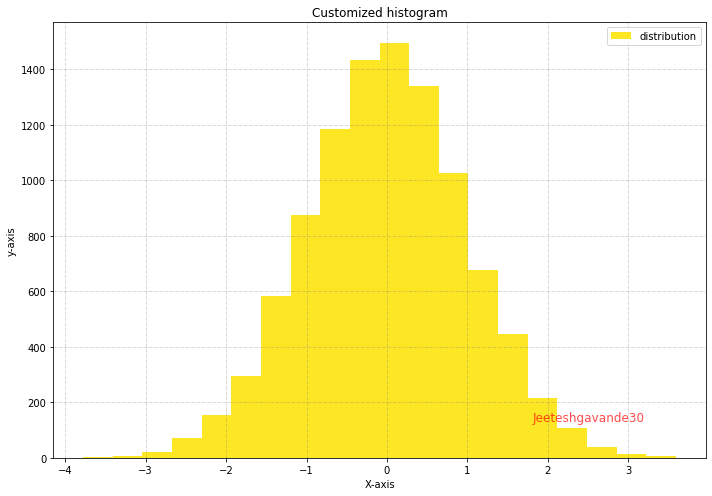

Referencias:

**[1] : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/**

**[2]: https://www.mdirector.com/marketing-automation/estrategias-de-marketing-automation-para-fidelizar.html**

**[3]: https://blog.inconcertcc.com/automatiza-el-marketing-digital-en-tus-redes-sociales/**
